In [19]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) 
%matplotlib inline

In [20]:
df= pd.read_csv("scrubbed.csv",sep=',')

C:\Users\hp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning:

Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.



In [21]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [22]:
df.isnull().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

In [23]:
df[df["latitude"]=="33q.200088"].index

Int64Index([43782], dtype='int64')

In [24]:
df.drop(index=43782,axis=0,inplace=True)

In [25]:
df["latitude"]=df["latitude"].astype(float)
df["longitude "]=df["longitude "].astype(float)

In [26]:
df["country"].unique()

array(['us', nan, 'gb', 'ca', 'au', 'de'], dtype=object)

In [27]:
#US Coordinate Range

df.loc[(df["latitude"]>19.5) & (df["latitude"]<64.86) & (df["longitude "]>-161.75) & (df["longitude "]<-68.01),"country"].fillna("us",inplace=True)

#AU Coordinate Range

df[(df["latitude"]>-43) & (df["latitude"]<-12.46) & (df["longitude "]>113.66) & (df["longitude "]<153.61)]["country"].fillna("au",inplace=True)

#CA Coordinate Range

df[(df["latitude"]>42) & (df["latitude"]<83) & (df["longitude "]>-141) & (df["longitude "]<-53)]["country"].fillna("ca",inplace=True)

#UK Coordinate Range

df[(df["latitude"]>50.1) & (df["latitude"]<60.15) & (df["longitude "]>-7.64) & (df["longitude "]<1.75)]["country"].fillna("gb",inplace=True)

#DE Coordinate Range

df[(df["latitude"]>47.16) & (df["latitude"]<55) & (df["longitude "]>5.52) & (df["longitude "]<15.2)]["country"].fillna("de",inplace=True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [28]:
df["state"].fillna("?",inplace=True)
df["country"].fillna("?",inplace=True)

In [29]:
index_list=df[(df["country"]=="?") & (df["state"]=="?")].index
df.drop(index=index_list,inplace=True)

In [30]:
len(df)

77075

# TIME

In [13]:
#Clean duration column from punctuations

import re
import string
df["duration (seconds)"]=df["duration (seconds)"].astype(str)
df["duration (seconds)"]=df["duration (seconds)"].apply(lambda sentence:sentence.translate(str.maketrans('', '', string.punctuation)))

In [14]:
#Convert duration into float
#Convert dates into datetime objects from strings

df["duration (seconds)"]=df["duration (seconds)"].astype(float)

#Replace illegal usage with legal one
df["datetime"]=df["datetime"].str.replace("24:00","00:00")

df["datetime"] = pd.to_datetime(df["datetime"], format='%m/%d/%Y %H:%M')
df["date posted"]=pd.to_datetime(df["date posted"])

In [18]:
df.sort_values(by='datetime').iloc[10]

datetime                                              1936-09-15 19:00:00
city                                                      albany (canada)
state                                                                  pe
country                                                                ca
shape                                                           rectangle
duration (seconds)                                                  12000
duration (hours/min)                                           2o minutes
comments                I WAS PLAYING AT MY FRIEND&#39S HOME AFTER SUP...
date posted                                           2009-03-19 00:00:00
latitude                                                            52.25
longitude                                                        -81.6167
Name: 74515, dtype: object

In [191]:
####Frequency w.r.t Time

#Hourly data
hours_most_sightings = df['datetime'].dt.hour.value_counts()

#Yearly data
years_most_sightings = df['datetime'].dt.year.value_counts()

#Monthly data
month_most_sightings = df['datetime'].dt.month.value_counts()

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


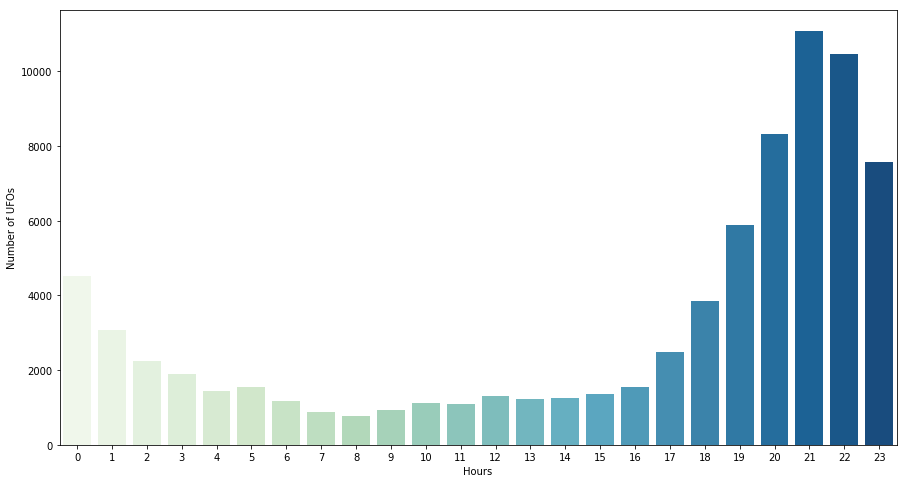

In [246]:
#Visualize hourly data

hour_index=hours_most_sightings.index
hour_values=hours_most_sightings.get_values()


plt.figure(figsize=(15,8))
plt.xlabel("Hours")
plt.ylabel("Number of UFOs")

hours_plot = sns.barplot(x=hour_index,y=hour_values, palette = "GnBu")
plt.savefig('hours.png')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


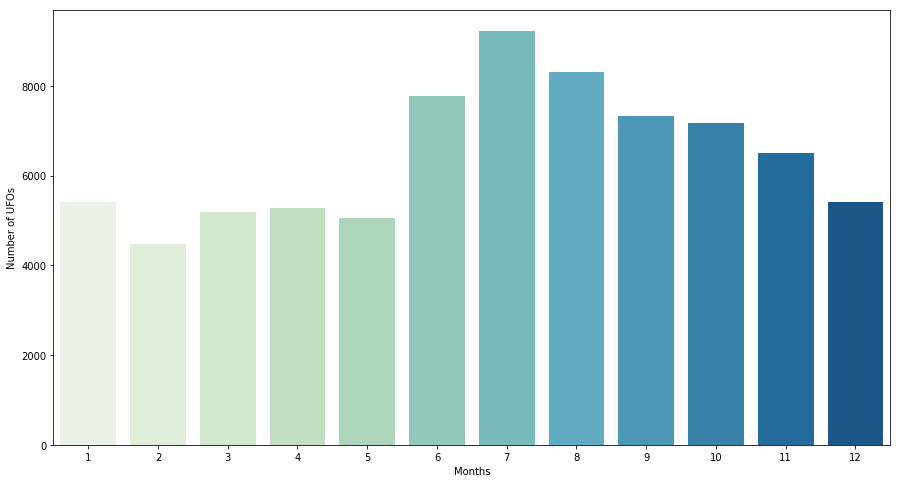

In [245]:
#Visualize monthly data

month_index=month_most_sightings.index
month_values=month_most_sightings.get_values()

plt.figure(figsize=(15,8))

plt.xlabel("Months")
plt.ylabel("Number of UFOs")

months_plot = sns.barplot(x=month_index,y=month_values, palette = "GnBu")
plt.savefig('months.png')

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


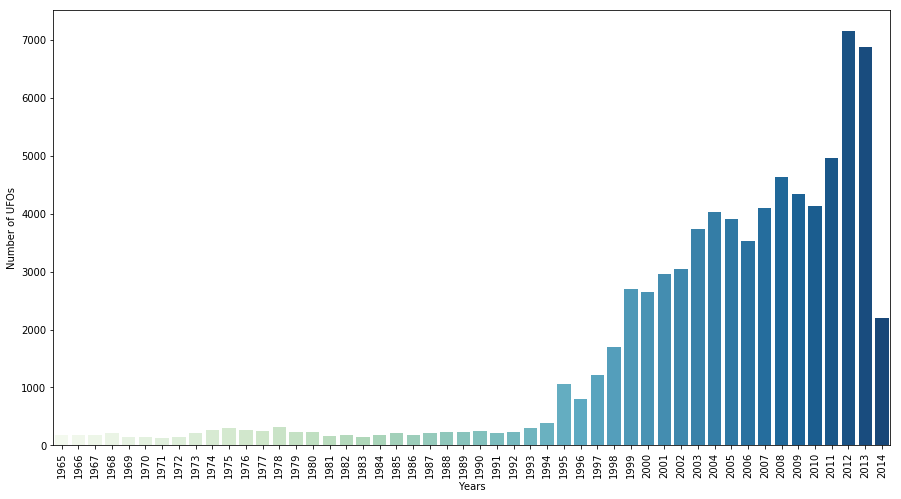

In [243]:
#Visualize yearly data

year_index=years_most_sightings.index
year_values=years_most_sightings.get_values()

plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)
plt.xlabel('Years')
plt.ylabel('Number of UFOs')

year_plot = sns.barplot(x=year_index[:50],y=year_values[:50], palette = "GnBu")
plt.savefig('years.png')

In [203]:
### Seasonal distribution

winter=[12,1,2]
spring=[3,4,5]
summer=[6,7,8]
fall=[9,10,11]

seasons=[]

for element in df.datetime:
    if element.month in winter:
        seasons.append("Winter")
    elif element.month in spring:
        seasons.append("Spring")
    elif element.month in summer:
        seasons.append("Summer")
    else:
        seasons.append("Fall")

In [ ]:
#Convert seasons into Series

seasons=pd.Series(seasons)
seasons_val=seasons.value_counts()

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


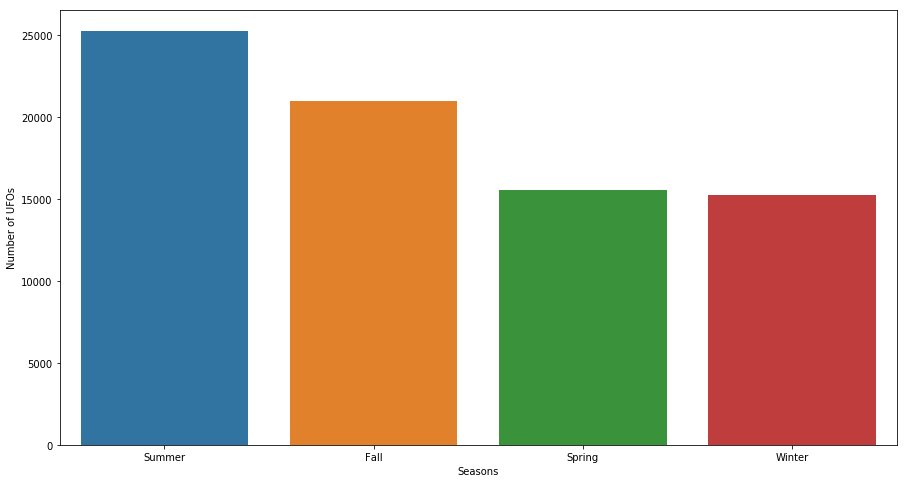

In [247]:
#Visualize seasonal data

season_index=seasons_val.index
season_values=seasons_val.get_values()

plt.figure(figsize=(15,8))

plt.xlabel("Seasons")
plt.ylabel("Number of UFOs")



season_plot = sns.barplot(x=season_index,y=season_values)
plt.savefig('seasons.png')

In [213]:
#Year of observation and year of posting 

year_happened=df["datetime"].dt.year
year_posted=df["date posted"].dt.year

In [249]:
#Year difference between two dates
year_difference=year_posted-year_happened

year_dif_index=year_difference.value_counts().index
year_dif_vals=year_difference.value_counts().get_values()

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


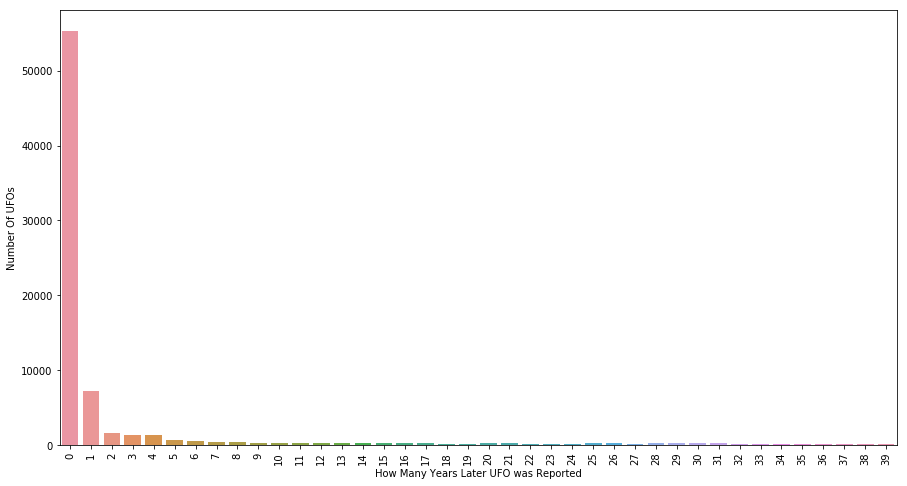

In [251]:
#Visualize the distribution of year differences

plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)

plt.xlabel("How Many Years Later UFO was Reported")
plt.ylabel("Number Of UFOs")

sns.barplot(x=year_dif_index[:40],y=year_dif_vals[:40])
plt.savefig('year_diff.png')

In [ ]:
##### DURATION
durations=[]
for duration in df["duration (seconds)"]:
    if duration<=300:
        durations.append("<5 mins")
    elif duration>300 and duration <=3600:
        durations.append("5 mins-1 hour")
    elif duration>3600 and duration<=86400:
        durations.append("1 hour-1 day")
    else:
        durations.append(">1 day")
        
durations=pd.Series(durations)

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


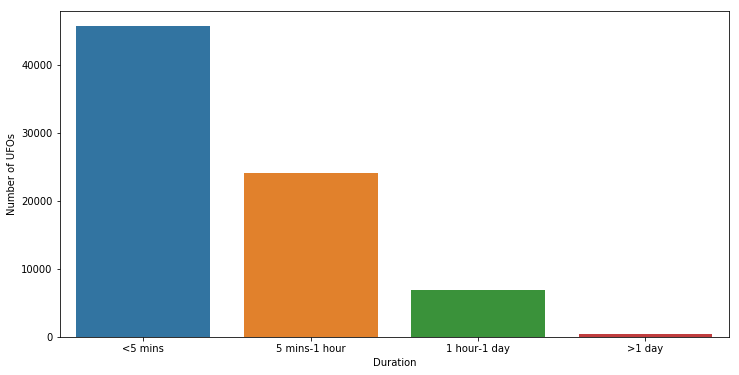

In [252]:
#Visualize durational distribution of UFOs

plt.figure(figsize=(12,6))
plt.xticks(rotation = 0)

plt.xlabel("Duration")
plt.ylabel("Number of UFOs")

sns.barplot(x=durations.value_counts().index,y=durations.value_counts().get_values())
plt.savefig('duration.png')

# LOCATION

In [31]:
#How many entries each country has
df["country"].value_counts()

us    65114
?      6413
ca     3000
gb     1905
au      538
de      105
Name: country, dtype: int64

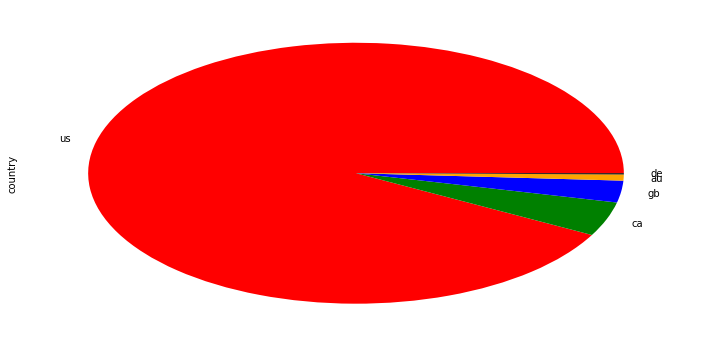

In [32]:
#Portions of each country is shown on a pie chart
country_sightings=df[df["country"]!="?"].country.value_counts()
colors = ['red','green','blue','orange','black']

plt.figure(figsize=(12,6))
country_sightings.plot(kind='pie',colors=colors)
plt.savefig("pie_chart.png")

In [34]:
country_sightings=df[df["country"]!="?"].country.value_counts()
country_sightings

us    65114
ca     3000
gb     1905
au      538
de      105
Name: country, dtype: int64

In [41]:
country_populations={"us":327.2,"ca":37.6,"gb":66.4,"au":24.6,"de":82.8}
countries_normalized=country_sightings/pd.Series(country_populations)
countries_normalized.name="Countries Normalized"

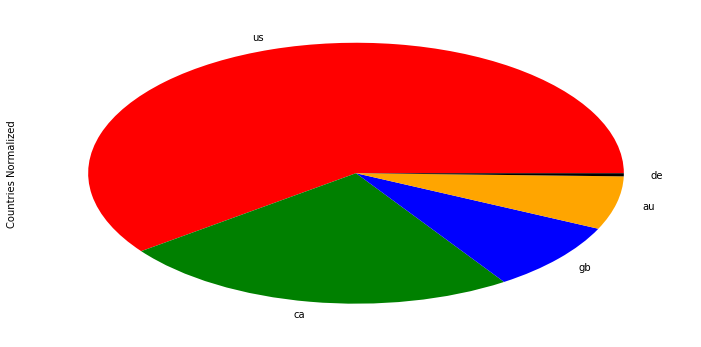

In [42]:
plt.figure(figsize=(12,6))
countries_normalized.plot(kind='pie',colors=colors)

In [38]:
countries_normalized

us    199.003667
ca     79.787234
gb     28.689759
au     21.869919
de      1.268116
dtype: float64

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



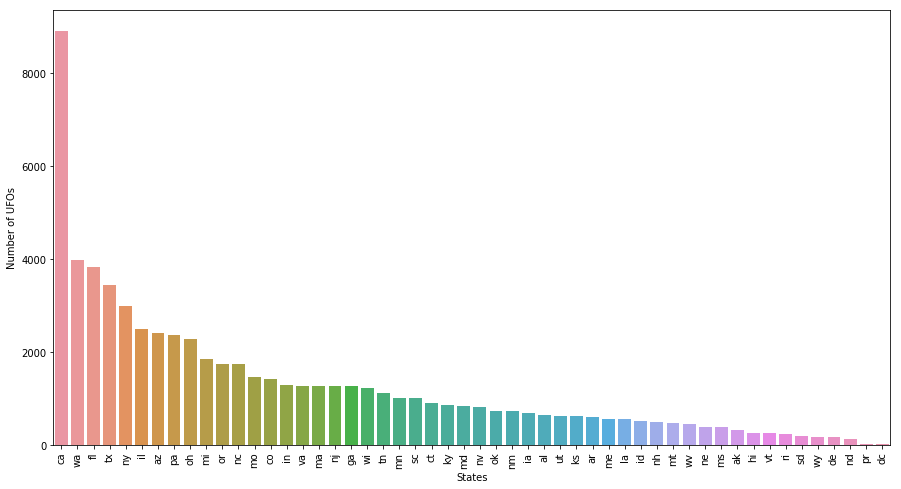

In [277]:
#The distribution of UFOs w.r.t states

states=df[df["country"]=="us"].state.value_counts()

states_index=states.index
states_values=states.get_values()

plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)
plt.xlabel("States")
plt.ylabel("Number of UFOs")

state_plot = sns.barplot(x=states_index,y=states_values)
plt.savefig("states.png")

In [281]:
#Dictionary for each state's population

state_populations = {'al':4872725.,'ak':746079.,'az':7044577.,'ar':2998643.,'ca':39506094.,
            'co':5632271.,'ct':3568174.,'de':960054.,'dc':691963.,'fl':20979964.,
            'ga':10421344.,'hi':1431957.,'id':1713452.,'il':12764031.,'in':6653338.,
            'ia':3147389.,'ks':2907857.,'ky':4449337.,'la':4694372.,'me':1333505.,
            'md':6037911.,'ma':6839318.,'mi':9938885.,'mn':5557469.,'ms':2988062.,
            'mo':6109796.,'mt':1052967.,'ne':1920467.,'nv':2996358,'nh':1339479.,
            'nj':8953517.,'nm':2081702.,'ny':19743395.,'nc':10258390.,'nd':759069.,
            'oh':11623656.,'ok':3939708.,'or':4162296.,'pa':12776550.,'pr':3661538.,
            'ri':1057245.,'sc':5027404.,'sd':872989.,'tn':6707332.,'tx':28295553.,
            'ut':3111802.,'vt':623100.,'va':8456029.,'wa':7415710.,'wv':1821151.,
            'wi':5789525.,'wy':584447.}

In [282]:
#Convert state populations into Series
#Divide UFO observations by state populations and find percentage

state_populations=pd.Series(state_populations)
state_density=(states/state_populations)*100


C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



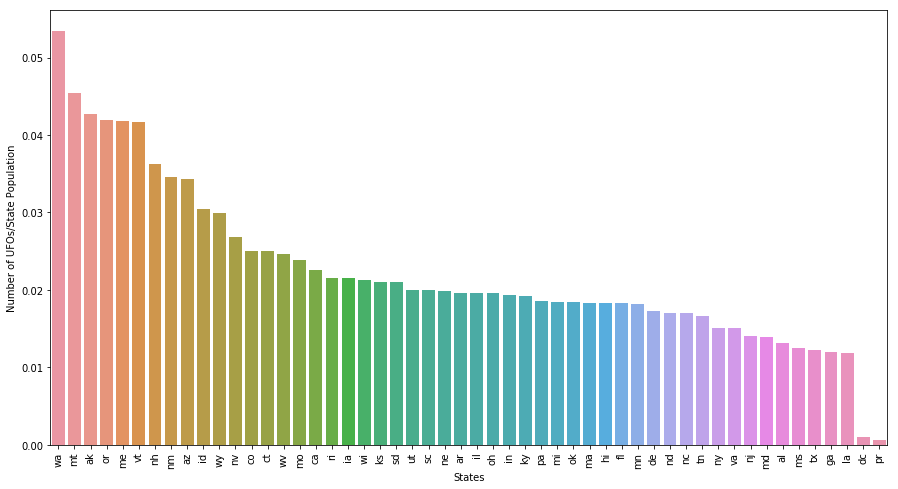

In [283]:
#Visualize UFO distributions w.r.t states after populations are considered

state_density=state_density.sort_values(ascending=False)
state_index=state_density.index
state_density=state_density.get_values()

plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)
plt.xlabel("States")
plt.ylabel("Number of UFOs/State Population")

state_plot = sns.barplot(x=state_index,y=state_density)
plt.savefig("normalized_state.png")

In [201]:
#How many UFOs were seen in Northern Hemisphere

northern_hemisphere=(df["latitude"]>=0).sum()
northern_hemisphere

76510

In [202]:
#How many UFOs were seen in Southern Hemisphere

southern_hemisphere=(df["latitude"]<0).sum()
southern_hemisphere

565

In [ ]:
#Maps for Visualization

In [286]:
#Distributions on US map

data = [
        dict(
        type='choropleth',
        locations = [state.upper() for state in states.index],
        z = states.get_values(),
        locationmode = 'USA-states',
        text = "times",
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Sight rates by states")
        )
        ]

layout = dict(
        title = 'UFO sight rates from USA',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
              )


fig = go.Figure(data=data, layout=layout)
py.iplot(fig)
plt.savefig("states_map.png")


<Figure size 432x288 with 0 Axes>

# SHAPE

In [287]:
#Number of each unique shape

df["shape"].value_counts()

light        15934
triangle      7615
circle        7257
fireball      5987
other         5368
unknown       5364
sphere        5168
disk          4944
oval          3569
formation     2366
cigar         1972
changing      1876
flash         1273
rectangle     1256
cylinder      1237
diamond       1129
chevron        923
egg            723
teardrop       722
cone           296
cross          223
delta            7
crescent         2
round            2
changed          1
flare            1
dome             1
hexagon          1
pyramid          1
Name: shape, dtype: int64

In [226]:
#Most popular 3 shapes in each country

top_3_shapes_of_each_country = pd.DataFrame(df[df["country"]!="?"].groupby("country")['shape'].value_counts().groupby(level=0).head(3))
top_3_shapes_of_each_country.columns = ['Count']
top_3_shapes_of_each_country

Count
country shape          
au      light       119
        circle       62
        disk         50
ca      light       655
        circle      284
        triangle    268
de      light        20
        circle       10
        fireball      9
gb      light       361
        circle      243
        triangle    169
us      light     13473
        triangle   6549
        circle     6118

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



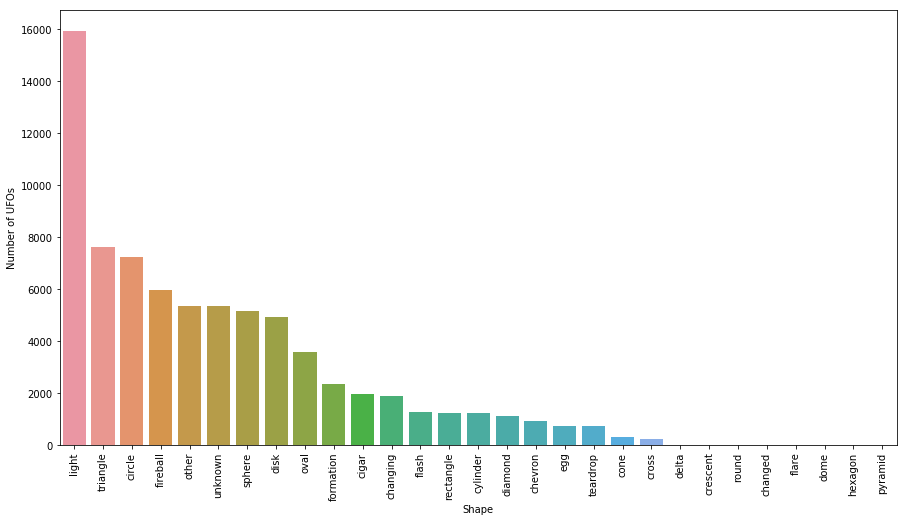

In [288]:
#Visualize the distribution of shapes

shapes=df["shape"].value_counts()

shape_index=shapes.index
shape_vals=shapes.get_values()


plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)
plt.xlabel("Shape")
plt.ylabel("Number of UFOs")

sns.barplot(x=shape_index,y=shape_vals)
plt.savefig("Shape.png")

In [43]:
#Function to clear the punctuation

def clean_comment(x):
    y=x.translate(str.maketrans('', '', string.punctuation))
    return y

In [44]:
#Search for the shapes in each comment
#Check if the comments and the shapes are consistent

shape_names_list=[shape for shape in shapes.index]

count=0
comments_words=[]
for sentence in df.comments.dropna():
    temp_sentence=[]
    sentence=sentence.lower()
    words_=sentence.split()
    for i in words_:
        i=clean_comment(i)
        temp_sentence.append(i)
    for element in shape_names_list:
        if element in temp_sentence:
            count=count+1
            comments_words.append(element)
print(count)

NameError: name 'shapes' is not defined

In [232]:
#Convert into Series
df_comments=pd.Series(comments_words)

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



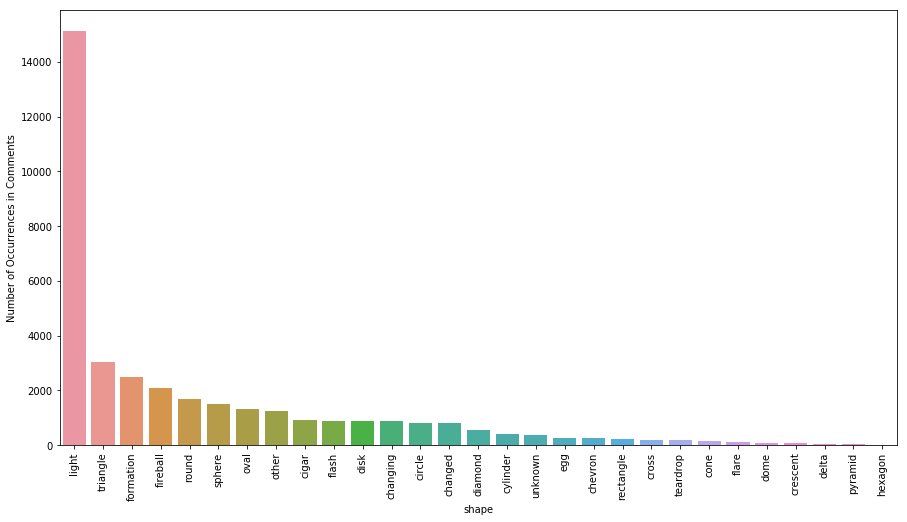

In [289]:
#Visualize the occurence of each shape in the comments

plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)
plt.xlabel("shape")
plt.ylabel("Number of Occurrences in Comments")

sns.barplot(x=df_comments.value_counts().index,y=df_comments.value_counts().get_values())
plt.savefig("comment_shape.png")

# MOST FREQUENT WORDS

<Figure size 432x288 with 0 Axes>

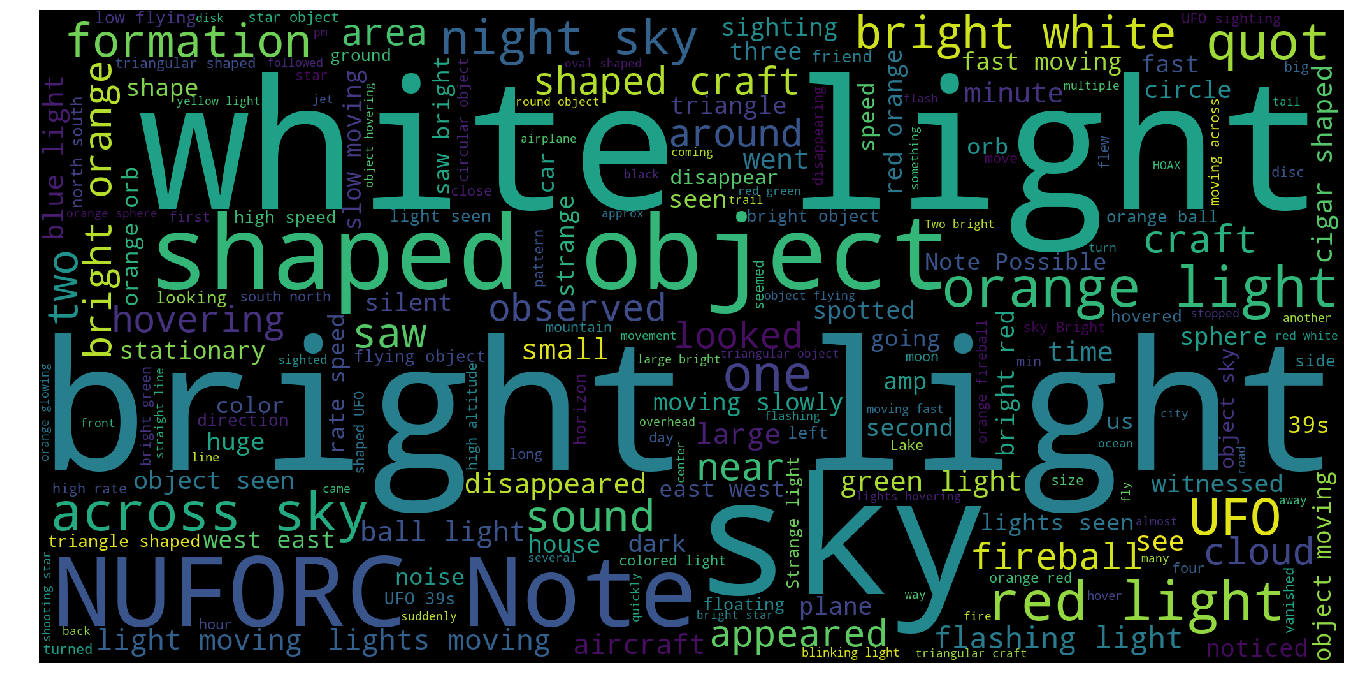

In [292]:
#Create a WordCloud to see the most frequent words

words = [i for i in df.comments.dropna()]
    
words = " ".join(words)

plt.figure()
plt.subplots(figsize=(30,15))
wordcloud = WordCloud(
                          background_color='black').generate(words)
plt.imshow(wordcloud)
plt.axis('off')

plt.savefig("WordCloud.png")
plt.show()


# CORRELATION BETWEEN AIRPORTS/GOVERNMENT FACILITIES/LANDMARKS

In [45]:
#Define ana array of important words

landmarks=["airport","airports","nasa","plane","airplane","government","military","base",
           "aircraft","satellite","research","air port"]

In [46]:
#Search for comments to check how many times each word above are used

count=0
landmark_words=[]

for sentence in df.comments.dropna():
    temp_sentence=[]
    sentence=sentence.lower()
    words_=sentence.split()
    for i in words_:
        i=clean_comment(i)
        temp_sentence.append(i)
    for element in landmarks:
        if element in temp_sentence:
            count=count+1
            landmark_words.append(element)
            
print(count)

3500


In [47]:
#Number of times each word above were seen

landmark_words=pd.Series(landmark_words)
landmark_words.value_counts()


aircraft      1169
plane          735
airport        382
airplane       349
military       317
satellite      275
base           198
government      28
nasa            26
research        19
airports         2
dtype: int64

In [48]:
landmark_words.value_counts().sum()

3500

In [49]:
3500/len(df)*100

4.5410314628608495